In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)

latexify()

/home/sieben/.local/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/home/sieben/.local/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


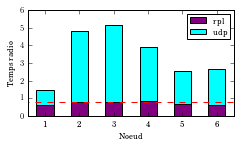

In [22]:
l = []
for i in range(2, 8):
    df = pd.read_csv("protocol_repartition_%d.csv"% i)
    df["Noeud"] = i - 1
    l.append(df)
df = pd.concat(l)


ax = df.groupby("Noeud").sum()[["rpl", "udp"]].plot(kind="bar", stacked=True, color=["purple", "cyan"])
ax.set_ylabel("Temps radio")
ax.set_xticklabels(range(1, 7), rotation=0)
fig = plt.gcf()
fig.tight_layout()
fig.savefig("new_repartition_protocol_depth.pdf")
ax.plot([-1, 7], [0.8, 0.8], 'r--')
fig = plt.gcf()
fig.tight_layout()
fig.savefig("new_repartition_protocol_depth_hl.pdf")

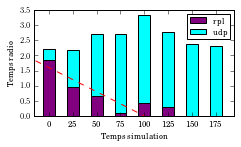

In [23]:
fig = plt.figure()
ax = df.groupby("bin_start").sum()[["rpl", "udp"]].plot(kind="bar", stacked=True, color=["purple", "cyan"])
ax.set_ylabel("Temps radio")
ax.set_xticklabels(range(0, 200, 25), rotation=0)
ax.set_xlabel("Temps simulation")
ax.set_xlim((-0.6,7.75))
fig = plt.gcf()
fig.tight_layout()
fig.savefig("new_repartition_protocol.pdf")
ax.plot([-1, 4], [2, 0], 'r--')
fig = plt.gcf()
fig.tight_layout()
fig.savefig("new_repartition_protocol_hl.pdf")

In [66]:
df.groupby("Noeud").sum()[["rpl", "udp"]].mean()

rpl    0.711253
udp    2.716672
dtype: float64